<a href="https://colab.research.google.com/github/Fin-N1049/ComputerVision/blob/main/computerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q opencv-contrib-python


Keypoints Image 1: 3948
Keypoints Image 2: 3948
Good Matches: 3948


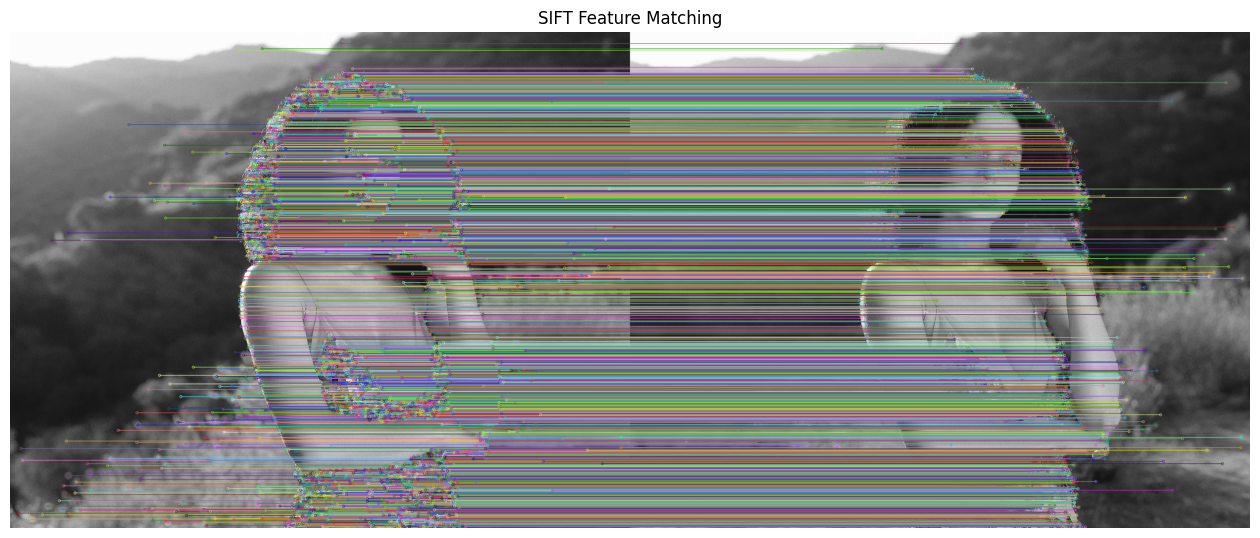

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read images (grayscale)
img1 = cv2.imread("/content/chasei.webp", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/chasei.webp", cv2.IMREAD_GRAYSCALE)

assert img1 is not None and img2 is not None, "Image loading failed"

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints & descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

print(f"Keypoints Image 1: {len(kp1)}")
print(f"Keypoints Image 2: {len(kp2)}")

# Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2)

# KNN matching
matches = bf.knnMatch(des1, des2, k=2)

# Lowe's Ratio Test
good_matches = []
ratio = 0.75

for m, n in matches:
    if m.distance < ratio * n.distance:
        good_matches.append(m)

print(f"Good Matches: {len(good_matches)}")

# Draw matches
matched_img = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    good_matches,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Convert BGR → RGB for matplotlib (important in Colab)
matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(16, 8))
plt.imshow(matched_img)
plt.title("SIFT Feature Matching")
plt.axis("off")
plt.show()


Keypoints Image 1: 3948
Keypoints Image 2 (rotated): 4685
Good Matches: 2688


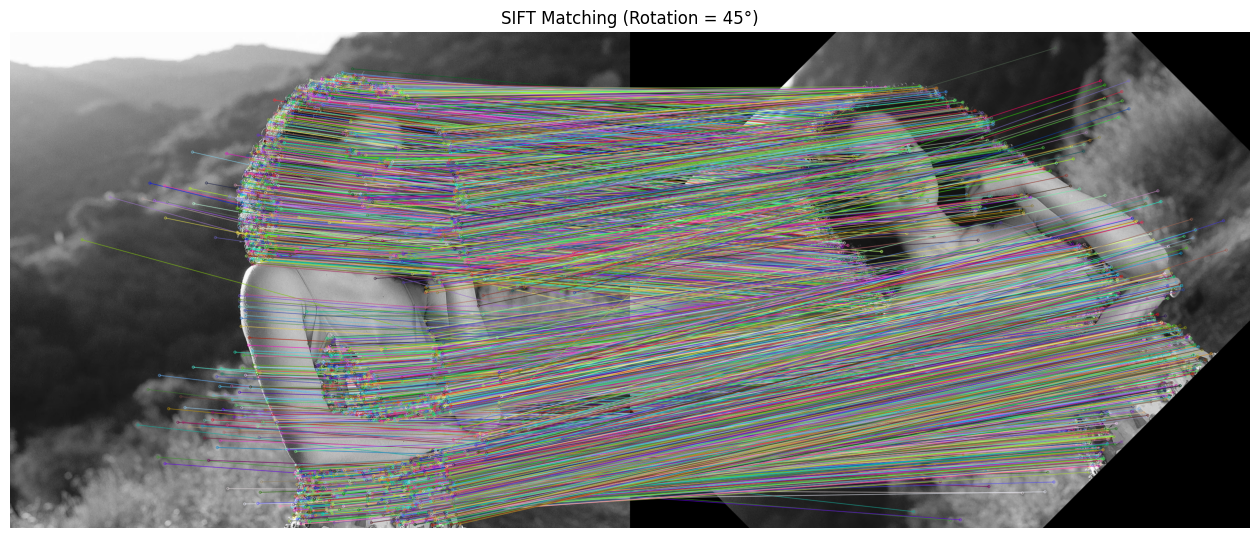

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read images (grayscale)
img1 = cv2.imread("/content/chasei.webp", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/chasei.webp", cv2.IMREAD_GRAYSCALE)

assert img1 is not None and img2 is not None, "Image loading failed"

# -------------------------------
# Rotate second image
# -------------------------------
angle = 45  # degrees (try 30, 60, 90, etc.)
h, w = img2.shape
center = (w // 2, h // 2)

rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
img2_rot = cv2.warpAffine(img2, rot_mat, (w, h))

# -------------------------------
# Create SIFT detector
# -------------------------------
sift = cv2.SIFT_create()

# Detect keypoints & descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2_rot, None)

print(f"Keypoints Image 1: {len(kp1)}")
print(f"Keypoints Image 2 (rotated): {len(kp2)}")

# -------------------------------
# Brute Force Matcher
# -------------------------------
bf = cv2.BFMatcher(cv2.NORM_L2)

matches = bf.knnMatch(des1, des2, k=2)

# Lowe's Ratio Test
good_matches = []
ratio = 0.75

for m, n in matches:
    if m.distance < ratio * n.distance:
        good_matches.append(m)

print(f"Good Matches: {len(good_matches)}")

# -------------------------------
# Draw matches
# -------------------------------
matched_img = cv2.drawMatches(
    img1, kp1,
    img2_rot, kp2,
    good_matches,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Convert to RGB for matplotlib
matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(16, 8))
plt.imshow(matched_img)
plt.title(f"SIFT Matching (Rotation = {angle}°)")
plt.axis("off")
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read images (grayscale)
img1 = cv2.imread("/content/chasei.webp", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/chasei.web", cv2.IMREAD_GRAYSCALE)

assert img1 is not None and img2 is not None, "Image loading failed"

# -------------------------------
# Rotate second image
# -------------------------------
angle = 45  # degrees (try 30, 60, 90, etc.)
h, w = img2.shape
center = (w // 2, h // 2)

rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
img2_rot = cv2.warpAffine(img2, rot_mat, (w, h))

# -------------------------------
# Create SIFT detector
# -------------------------------
sift = cv2.SIFT_create()

# Detect keypoints & descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2_rot, None)

print(f"Keypoints Image 1: {len(kp1)}")
print(f"Keypoints Image 2 (rotated): {len(kp2)}")

# -------------------------------
# Brute Force Matcher
# -------------------------------
bf = cv2.BFMatcher(cv2.NORM_L2)

matches = bf.knnMatch(des1, des2, k=2)

# Lowe's Ratio Test
good_matches = []
ratio = 0.75

for m, n in matches:
    if m.distance < ratio * n.distance:
        good_matches.append(m)

print(f"Good Matches: {len(good_matches)}")

# -------------------------------
# Draw matches
# -------------------------------
matched_img = cv2.drawMatches(
    img1, kp1,
    img2_rot, kp2,
    good_matches,
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Convert to RGB for matplotlib
matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(16, 8))
plt.imshow(matched_img)
plt.title(f"SIFT Matching (Rotation = {angle}°)")
plt.axis("off")
plt.show()


In [1]:
!pip install opencv-python scikit-image scikit-learn tqdm


In [2]:

!wget -q http://pascal.inrialpes.fr/data/human/INRIAPerson.tar
!tar -xf INRIAPerson.tar

# ------------------------------
# Imports
# ------------------------------
import cv2
import os
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# ------------------------------
# HOG feature extraction
# ------------------------------
def extract_hog(img):
    img = cv2.resize(img, (64, 128))  # Standard pedestrian size
    features = hog(
        img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )
    return features

# ------------------------------
# Load dataset
# ------------------------------
def load_data(pos_path, neg_path):
    X, y = [], []

    for img_name in tqdm(os.listdir(pos_path)):
        img = cv2.imread(os.path.join(pos_path, img_name), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            X.append(extract_hog(img))
            y.append(1)  # pedestrian

    for img_name in tqdm(os.listdir(neg_path)):
        img = cv2.imread(os.path.join(neg_path, img_name), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            X.append(extract_hog(img))
            y.append(0)  # non-pedestrian

    return np.array(X), np.array(y)

# ------------------------------
# Load training data
# ------------------------------
train_pos = "INRIAPerson/Train/pos"
train_neg = "INRIAPerson/Train/neg"

print("Loading training data...")
X_train, y_train = load_data(train_pos, train_neg)

# ------------------------------
# Train SVM
# ------------------------------
print("\nTraining SVM...")
svm = LinearSVC(max_iter=10000)
svm.fit(X_train, y_train)

# ------------------------------
# Load test data
# ------------------------------
test_pos = "INRIAPerson/Test/pos"
test_neg = "INRIAPerson/Test/neg"

print("\nLoading test data...")
X_test, y_test = load_data(test_pos, test_neg)

# ------------------------------
# Evaluation
# ------------------------------
print("\nEvaluating model...")
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


tar: INRIAPerson.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
Loading training data...


FileNotFoundError: [Errno 2] No such file or directory: 'INRIAPerson/Train/pos'

In [3]:
!wget http://pascal.inrialpes.fr/data/human/INRIAPerson.tar
!tar -xf INRIAPerson.tar


--2026-01-30 05:17:07--  http://pascal.inrialpes.fr/data/human/INRIAPerson.tar
Resolving pascal.inrialpes.fr (pascal.inrialpes.fr)... 194.199.16.17
Connecting to pascal.inrialpes.fr (pascal.inrialpes.fr)|194.199.16.17|:80... failed: Connection refused.
tar: INRIAPerson.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [4]:
# ======================
# HOG + SVM Pedestrian Detection (Full)
# ======================

# Install libs
!pip install -q opencv-python scikit-image scikit-learn tqdm kaggle

# Upload your kaggle.json manually
from google.colab import files
files.upload()  # upload here

# Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Kaggle dataset
!kaggle datasets download -d jcoral02/inriaperson -q
!unzip -q inriaperson.zip -d INRIAPerson

# -----------------------
import cv2, os
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# HOG extract
def extract_hog(img):
    img = cv2.resize(img, (64, 128))
    features = hog(
        img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )
    return features

# load data
def load_data(pos_path, neg_path):
    X, y = [], []
    for img_name in tqdm(os.listdir(pos_path)):
        img = cv2.imread(os.path.join(pos_path, img_name), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            X.append(extract_hog(img)); y.append(1)
    for img_name in tqdm(os.listdir(neg_path)):
        img = cv2.imread(os.path.join(neg_path, img_name), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            X.append(extract_hog(img)); y.append(0)
    return np.array(X), np.array(y)

# paths (adjust if needed)
train_pos = "INRIAPerson/Train/pos"
train_neg = "INRIAPerson/Train/neg"
test_pos  = "INRIAPerson/Test/pos"
test_neg  = "INRIAPerson/Test/neg"

print("Loading training data...")
X_train, y_train = load_data(train_pos, train_neg)

print("Training SVM...")
svm = LinearSVC(max_iter=10000)
svm.fit(X_train, y_train)

print("Loading test data...")
X_test, y_test = load_data(test_pos, test_neg)

print("Evaluating...")
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

In [6]:
%%bash
mkdir -p ~/.kaggle

cat << EOF > ~/.kaggle/kaggle.json
{
  "username": "finsonooooo",
  "key": "KGAT_36a07db57c5a60e811a69d3796a3d2e2"
}
EOF

chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d jcoral02/inriaperson
!unzip -q inriaperson.zip -d INRIAPerson


Dataset URL: https://www.kaggle.com/datasets/jcoral02/inriaperson
License(s): unknown
 97% 565M/582M [00:02<00:00, 202MB/s]
100% 582M/582M [00:02<00:00, 284MB/s]


In [9]:
import cv2, os
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm


train_pos = "/content/INRIAPerson/Train/pos"
train_neg = "/content/INRIAPerson/Train/neg"

test_pos  = "/content/INRIAPerson/Test/pos"
test_neg  = "/content/INRIAPerson/Test/neg"

print("Loading training data...")
X_train, y_train = load_data(train_pos, train_neg)

print("Training SVM...")
svm = LinearSVC(max_iter=10000)
svm.fit(X_train, y_train)

print("Loading test data...")
X_test, y_test = load_data(test_pos, test_neg)

print("Evaluating...")
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Loading training data...


FileNotFoundError: [Errno 2] No such file or directory: '/content/INRIAPerson/Train/pos'

In [10]:
# ============================================
# Pedestrian Detection using HOG + SVM
# Works with INRIA (Annotations + JPEGImages)
# ============================================

import cv2
import os
import random
import numpy as np
import xml.etree.ElementTree as ET

from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# -----------------------------
# HOG feature extraction
# -----------------------------
def extract_hog(img):
    img = cv2.resize(img, (64, 128))  # Standard pedestrian window
    return hog(
        img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )

# -----------------------------
# Load POSITIVE samples
# (crop pedestrians from XML)
# -----------------------------
def load_positive(img_dir, ann_dir):
    X, y = [], []

    for ann_file in tqdm(os.listdir(ann_dir), desc="Loading positives"):
        tree = ET.parse(os.path.join(ann_dir, ann_file))
        root = tree.getroot()

        img_name = root.find("filename").text
        img_path = os.path.join(img_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        for obj in root.findall("object"):
            if obj.find("name").text != "person":
                continue

            box = obj.find("bndbox")
            x1 = int(box.find("xmin").text)
            y1 = int(box.find("ymin").text)
            x2 = int(box.find("xmax").text)
            y2 = int(box.find("ymax").text)

            crop = img[y1:y2, x1:x2]
            if crop.size == 0:
                continue

            X.append(extract_hog(crop))
            y.append(1)

    return X, y

# -----------------------------
# Load NEGATIVE samples
# (random background patches)
# -----------------------------
def load_negative(img_dir, ann_dir, num_neg=2):
    X, y = [], []

    for ann_file in tqdm(os.listdir(ann_dir), desc="Loading negatives"):
        tree = ET.parse(os.path.join(ann_dir, ann_file))
        root = tree.getroot()

        img_name = root.find("filename").text
        img = cv2.imread(os.path.join(img_dir, img_name), cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        h, w = img.shape

        for _ in range(num_neg):
            if h < 128 or w < 64:
                continue
            x = random.randint(0, w - 64)
            y0 = random.randint(0, h - 128)
            crop = img[y0:y0 + 128, x:x + 64]

            X.append(extract_hog(crop))
            y.append(0)

    return X, y

# -----------------------------
# Dataset paths
# -----------------------------
train_img = "/content/INRIAPerson/Train/JPEGImages"
train_ann = "/content/INRIAPerson/Train/Annotations"

test_img  = "/content/INRIAPerson/Test/JPEGImages"
test_ann  = "/content/INRIAPerson/Test/Annotations"

# -----------------------------
# Load TRAIN data
# -----------------------------
print("\nLoading training data...")
X_pos, y_pos = load_positive(train_img, train_ann)
X_neg, y_neg = load_negative(train_img, train_ann)

X_train = np.array(X_pos + X_neg)
y_train = np.array(y_pos + y_neg)

print("Training samples:", X_train.shape)

# -----------------------------
# Train SVM
# -----------------------------
print("\nTraining SVM...")
svm = LinearSVC(max_iter=10000)
svm.fit(X_train, y_train)

# -----------------------------
# Load TEST data
# -----------------------------
print("\nLoading test data...")
X_pos_t, y_pos_t = load_positive(test_img, test_ann)
X_neg_t, y_neg_t = load_negative(test_img, test_ann)

X_test = np.array(X_pos_t + X_neg_t)
y_test = np.array(y_pos_t + y_neg_t)

print("Test samples:", X_test.shape)

# -----------------------------
# Evaluation
# -----------------------------
print("\nEvaluating model...")
y_pred = svm.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Loading training data...


Loading negatives: 100%|██████████| 614/614 [00:17<00:00, 34.74it/s]


Training samples: (2468, 3780)

Training SVM...

Loading test data...


Loading negatives: 100%|██████████| 288/288 [00:11<00:00, 25.48it/s]

Test samples: (1173, 3780)

Evaluating model...

Accuracy: 0.9497016197783461

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       576
           1       0.95      0.95      0.95       597

    accuracy                           0.95      1173
   macro avg       0.95      0.95      0.95      1173
weighted avg       0.95      0.95      0.95      1173

